In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
w = tf.Variable(0, dtype=tf.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def train_step():
    with tf.GradientTape() as tape:
        cost = (w**2) - (10*w) + 25
    trainable_variables = [w]
    grads = tape.gradient(cost, trainable_variables)
    optimizer.apply_gradients(zip(grads, trainable_variables))
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


In [3]:
train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999997>


In [4]:
for i in range(200):
    train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000125>


In [5]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = (x**2)
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [6]:
w = tf.Variable(tf.random.normal((3,2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1.0, 2.0, 3.0]]

In [7]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.6935587 ,  1.5237305 ],
       [ 0.67810446, -1.5848539 ],
       [ 0.29035702,  1.6173174 ]], dtype=float32)>

In [8]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [25]:
x

[[1.0, 2.0, 3.0]]

In [9]:
with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)

In [10]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [11]:
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [12]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[2.9208386, 3.2059753],
       [5.841677 , 6.4119506],
       [8.762516 , 9.617926 ]], dtype=float32)>

In [13]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.9208386, 3.2059753], dtype=float32)>

In [14]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
    
    
  # Forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

In [15]:
grad

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.       ,  5.6143265],
        [ 0.       , 11.228653 ],
        [ 0.       , 16.84298  ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.       , 5.6143265], dtype=float32)>]

In [16]:
x = tf.constant([1, 0, 1, 0])
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [17]:
x = tf.constant([[1., 1.], [3., 2.]])
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.75>

In [18]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') 
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
    
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

In [21]:
grad

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 None,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.0>,
 None]

In [22]:
[var.name for var in tape.watched_variables()]

['x0:0', 'x2:0']

In [27]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [28]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

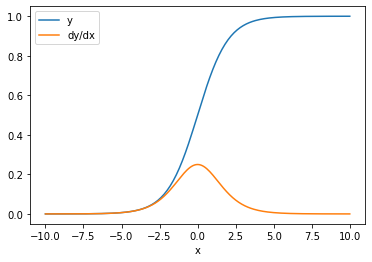

In [29]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [30]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.tanh(x)

dy_dx = tape.gradient(y, x)

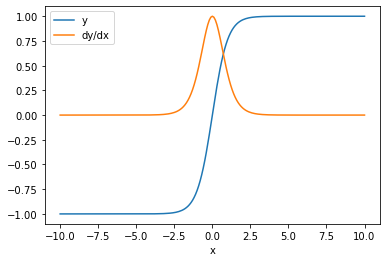

In [31]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [34]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
    g.watch(x)
    with tf.GradientTape() as gg:
        
        gg.watch(x)
        y = x * x
    dy_dx = gg.gradient(y, x)  # dy_dx = 2 * x
d2y_dx2 = g.gradient(dy_dx, x)  # d2y_dx2 = 2

In [35]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [36]:
d2y_dx2

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [37]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y
dz_dx = g.gradient(z, x)  # (4*x^3 at x = 3)
dy_dx = g.gradient(y, x)

In [38]:
dz_dx

<tf.Tensor: shape=(), dtype=float32, numpy=108.0>

In [39]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [40]:
x = tf.Variable(2.0)
w = tf.Variable(5.0)
with tf.GradientTape(
    watch_accessed_variables=True, persistent=True) as tape:
    
    tape.watch(x)
    y = x ** 2  
    z = w ** 3  
dy_dx = tape.gradient(y, x)
dz_dy = tape.gradient(z, w)

In [41]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [43]:
dz_dy

<tf.Tensor: shape=(), dtype=float32, numpy=75.0>

In [45]:
w = tf.Variable(0, dtype=tf.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def train_step():
    with tf.GradientTape() as tape:
        cost = (w**2) - (10*w) + 25
    trainable_variables = [w]
    grads = tape.gradient(cost, trainable_variables)
    optimizer.apply_gradients(zip(grads, trainable_variables))
#print(w)

In [46]:
train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999997>


In [47]:
for i in range(500):
    train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0000014>


In [65]:
x = tf.Variable(0, dtype=tf.float32)
y = tf.Variable(0, dtype=tf.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def MultiVar():
    with tf.GradientTape() as tape:
        cost = (x-3*y-8)**2
        trainable_variables = [x,y]
        grads = tape.gradient(cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
    

In [66]:
MultiVar()
print(x,y)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999998> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.099999994>


In [68]:
for i in range(2000):
    MultiVar()
print(x,y)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9999995> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.0000002>


In [3]:
w = tf.Variable(0, dtype=tf.float32)
x = np.array([1.0, -10.0, 25.0], dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1)
def training(w, x, optimizer):
    def cost_fn():
        return x[0]*w**2 + x[1]*w + x[2]
    for i in range(1000):
        optimizer.minimize(cost_fn, w)
    return w
v = training(w, x, optimizer)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000001>


In [75]:
optimizer.minimize(cost_fn, w)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1602>

In [76]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=160.20058>

In [5]:
def cost_fn():
    return x[0]*w**2 + x[1]*w + x[2]

In [6]:
for i in range(1000):
    optimizer.minimize(cost_fn, w)
print(w)    

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0000005>
